# Heart Attack Analysis and Prediction

**Process Involved in Data Visualisation and Analaysis are as follows:**

*1.Exploratory Data Analysis*

a) Problem Defenition

b) Variable Identification

c) Missing Values Treatment

d) Univariate Analysis

e) Multivariate Analysis

*2. Feature Engineering*

a) Outlier Treatment

b) Variable Transormation

c) Variable Creation

d) Dimensionality Reduction

*3. Predictive Modeling*

**Problem Defenition**

Heart disease is the major cause of morbidity and mortality globally: it accounts for more deaths annually than any other cause.It is anticipated that the development of computation methods that can predict the presence of heart disease will significantly reduce heart disease caused mortalities while early detection could lead to substantial reduction in health care costs. Traditional statistical methods draw inferences from a limited number of variables obtained from experiments performed under controlled conditions. In contrast, Machine Learning methods can use a large number of often complex variables obtained from a variety of medical data banks to predict whether a patient has heart disease. Cardiovascular medicine generates a plethora of biomedical, clinical and operational data as a part of patient health care delivery, making this field ideal for the development and use of computational methods for predicting a patient has cardiac disease. Recent efforts to develop computational models capable of analysing and predicting whether a person has heart disease have shown great promise.


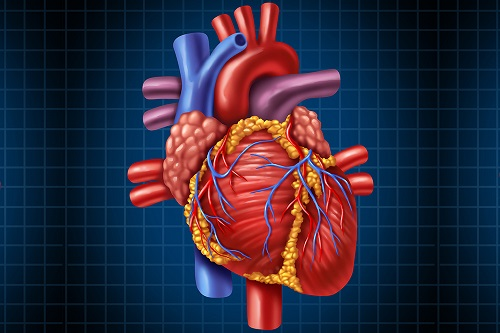

**Import Required Libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from scipy import stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Load Data Set**

In [2]:
data= pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Variable Description**
<pre><div>
 Age: age in years
    Gender: gender (1 = male; 0 = female)
    Cp: chest pain type
    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 0: asymptomatic
    Trtbps: resting blood pressure (in mm Hg on admission to the hospital)
    Chol: serum cholesterol in mg/dl
    Fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    Restecg: resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 005 mV)
    Value 2: showing probable or definite left ventricular hypertropy by Estes criteria
    Thalach: maximum heart rate achieved in beats per minute (bpm)
    Exang: exercise induced angina (1 = yes; 0 = no)
    Oldpeak: ST depression induced by exercise relative to rest
    Slope: the slope of the peak exercise ST segment
    Value 1: upsloping
    Value 2: flat
    Value 3: down-sloping
    Ca: number of major vessels (0-3) colored by fluoroscopy
    Thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
    The target feature has two classes and hence it is a binary classification problem. To reiterate, the goal is to predict whether a person has heart disease.
     0= less chance of heart attack 1= more chance of heart
 </div>
</pre>

**Find and remove duplicates**

In [3]:
duplicate= data[data.duplicated()]
print(f'Number of duplicate rows: {duplicate.shape}')
duplicate

Number of duplicate rows: (1, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Since we have one duplicate row, Let's drop it and cross check

In [4]:
data.drop_duplicates(inplace=True)
print(f'Number of duplicate rows: {data[data.duplicated()].shape}')

Number of duplicate rows: (0, 14)


*No missing rows!!*

**Check Missing Values**

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

*Since there is no missing values we can go for further exploration*

**UniVariate Analysis**

UniVariate analysis is the simplest form of statistical analysis, key fact is that one variable is involved


To get basic information about data set using info() function

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Basic statistical details about dataset using describe() function

In [7]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Descibe correlation between varibales using heat map

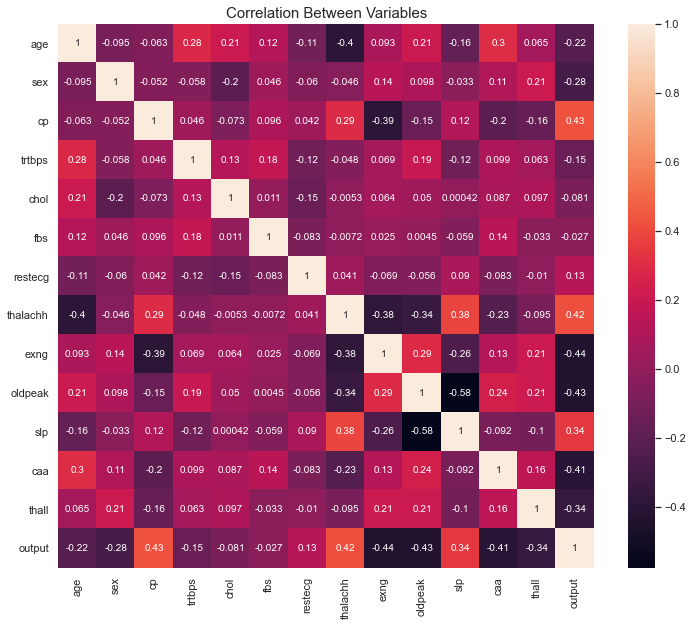

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Between Variables', fontsize= 15)
plt.show()

Output variable distribution

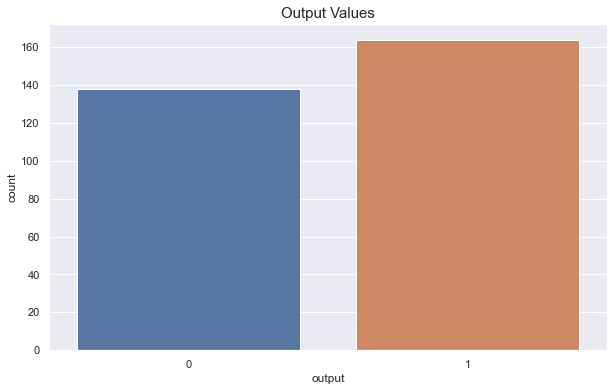

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(data= data,x='output' )
plt.title('Output Values', fontsize=15)
plt.show()

In [10]:
output_1= round(data.output.mean(),2)*100
output_0= round(1- data.output.mean(),2)*100
print(f'Output variable contains less chance of heart attack(0): {output_0}%, and more chance of heart attack(1): {output_1}%')  

Output variable contains less chance of heart attack(0): 46.0%, and more chance of heart attack(1): 54.0%


Output Vs Age

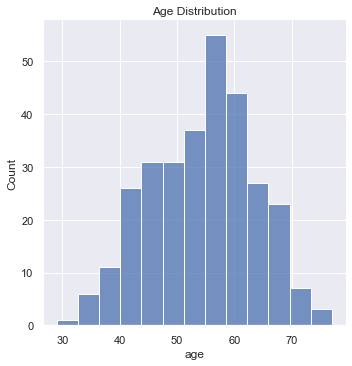

In [11]:
sns.displot(data= data, x='age')
plt.title('Age Distribution', fontsize= 12)
plt.show()

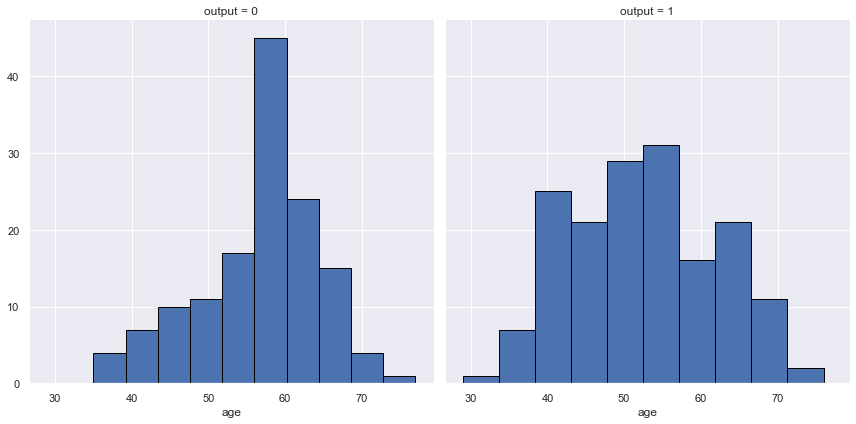

In [12]:

sns.FacetGrid(data=data,col='output',height=6).map(plt.hist,'age',edgecolor = "black")


*It seems like people age between 50 and 60 are more prone to heart attack cpmared to age between 40 and 50, But we need further clarification so we might go for multivariate analysis and need to check outliers.*

Output Vs Sex 

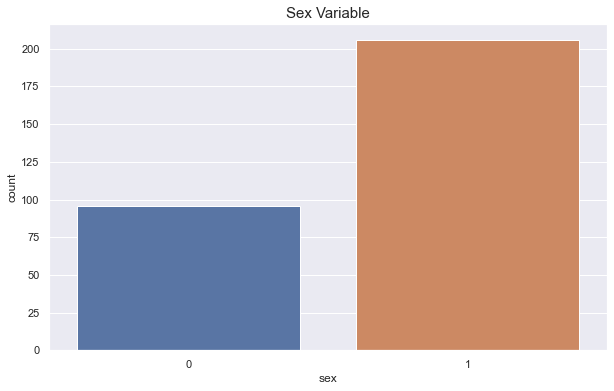

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='sex')
plt.title('Sex Variable',fontsize=15)
plt.show()

In [14]:
male= round(data.sex.mean(),2)*100
female= round(1-data.sex.mean(),2)*100
print(f'Sex variable contains male: {male}%, and female: {female}%')

Sex variable contains male: 68.0%, and female: 32.0%


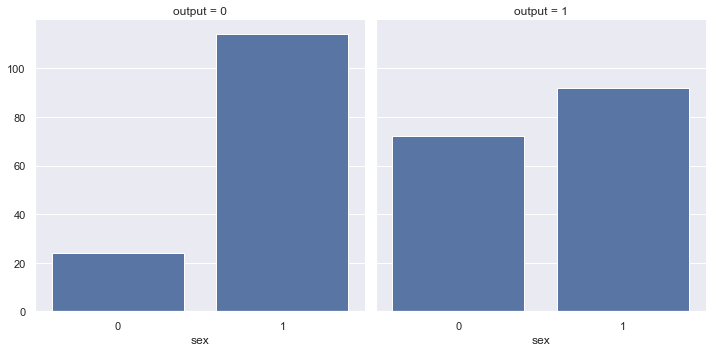

In [15]:
sns.FacetGrid(data= data,col='output',height=5).map(sns.countplot,'sex')

*From above graph it is clear that, significantly higher propotion of males are diagonised with heart desease compared to females.*

Output Vs Chest Pain Type (0,1,2,3)

0: Typical Angina

1: Atypical Angina

2: Non_Anginal Pain

3: Asymptomatic

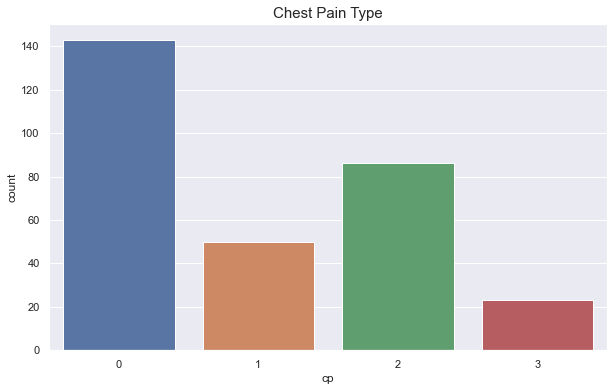

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data= data, x='cp')
plt.title('Chest Pain Type',fontsize=15)
plt.show()

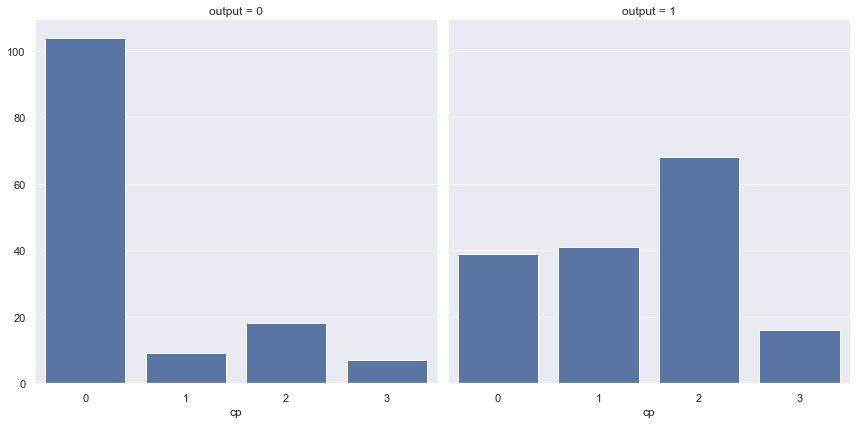

In [17]:
sns.FacetGrid(data= data, col= 'output',height=6).map(sns.countplot,'cp')

*People with non_anginal pain (type: 2) are prone to heart attack, but still we need multivariate analysis for further details.*

Output Vs Resting Blood Pressure ((in mm Hg on admission to the hospital)

Text(0.5, 1.0, 'Resting Blood Pressure Distribution')

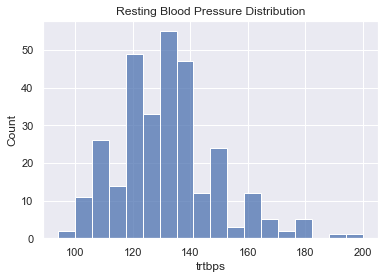

In [18]:
sns.histplot(data,x='trtbps')
plt.title('Resting Blood Pressure Distribution')

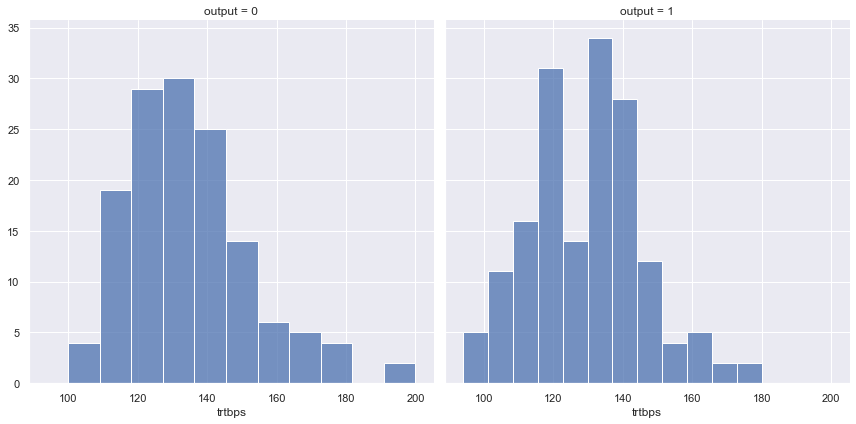

In [19]:
sns.FacetGrid(data,col='output',height=6).map(sns.histplot,'trtbps')

*As the things are not clear we need further investigation*

Output Vs Cholestrol 

Text(0.5, 1.0, 'Cholestrol Distribution')

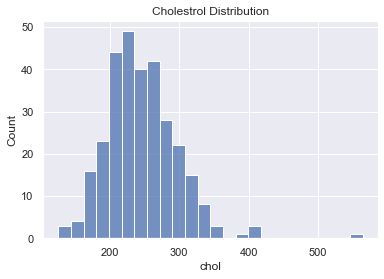

In [20]:
sns.histplot(data,x='chol')
plt.title('Cholestrol Distribution')

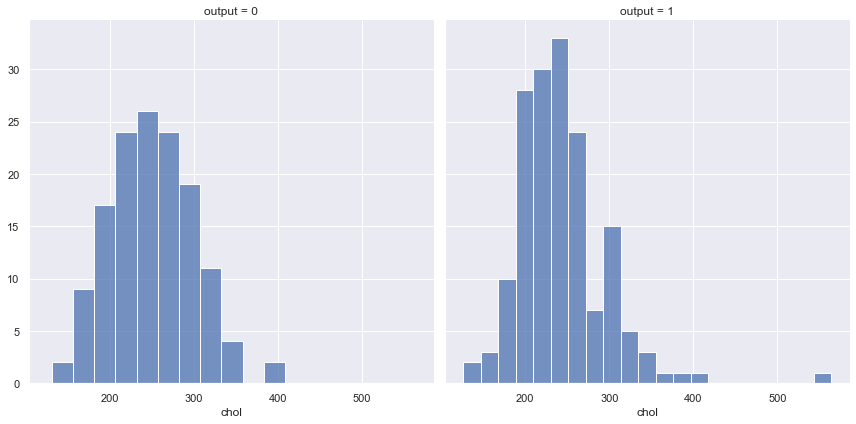

In [21]:
sns.FacetGrid(data,col='output',height=6).map(sns.histplot,'chol') 

Output vs Fasting Blood Sugar

Fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

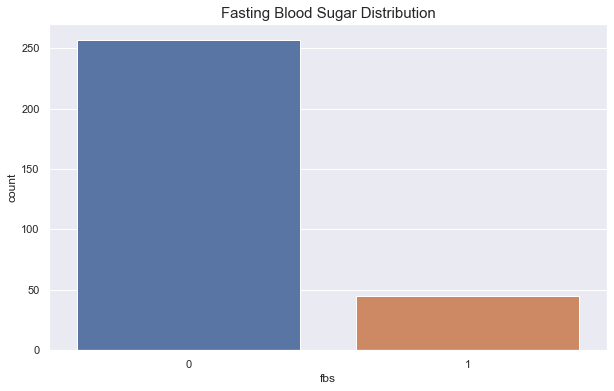

Output vs Fasting Blood Sugar


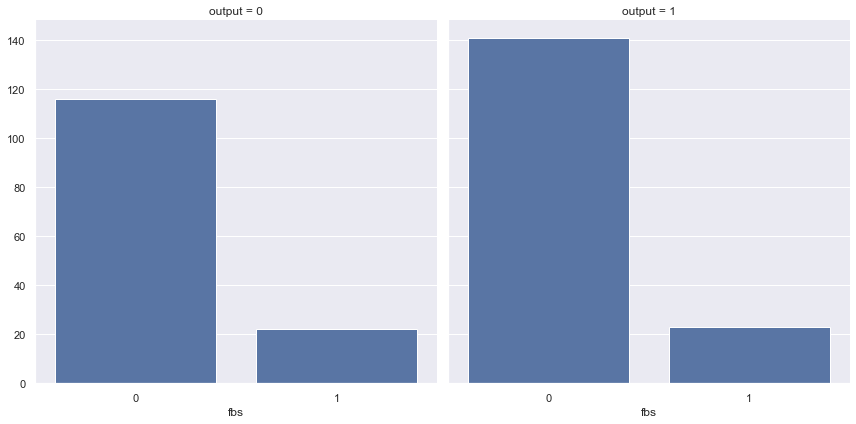

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='fbs')
plt.title('Fasting Blood Sugar Distribution',fontsize=15)
plt.show()
print('Output vs Fasting Blood Sugar')
sns.FacetGrid(data,col='output',height=6).map(sns.countplot,'fbs')
plt.show()

Output vs Resting Electrocardiographic Results

Value 0: Normal

Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 005 mV)

Value 2: Showing probable or definite left ventricular hypertropy by Estes criteria

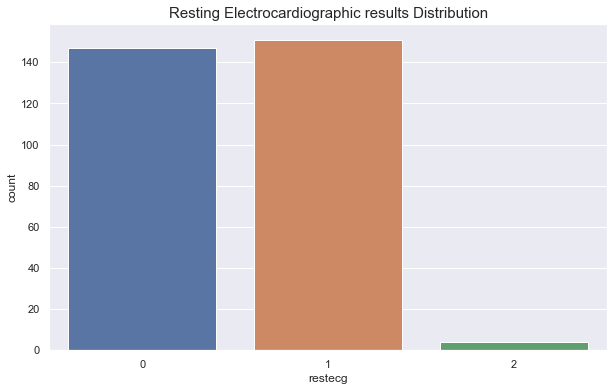

Output vs Resting Electrocardiographic Results


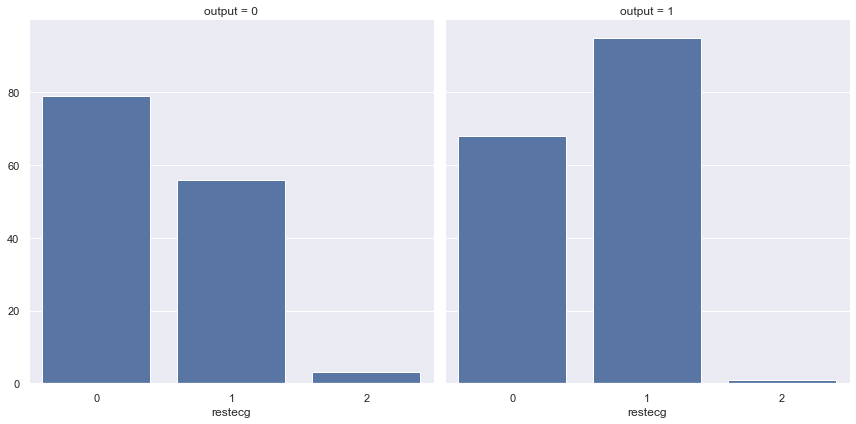

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='restecg')
plt.title('Resting Electrocardiographic results Distribution',fontsize=15)
plt.show()
print('Output vs Resting Electrocardiographic Results')
sns.FacetGrid(data,col='output',height=6).map(sns.countplot,'restecg')
plt.show()

*People Having ST-T wave abnormality (Type:1) are more prone to heart attack*

Output vs Thalachh(maximum heart rate achieved in beats per minute (bpm))

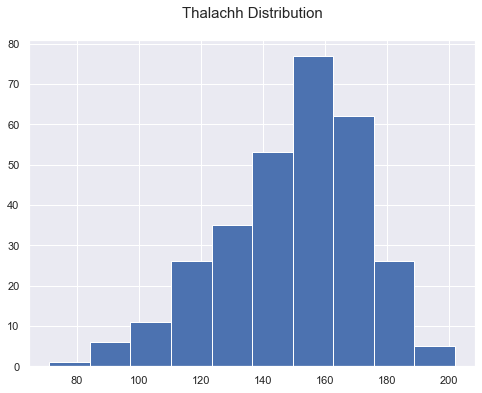

Output vs Thalachh


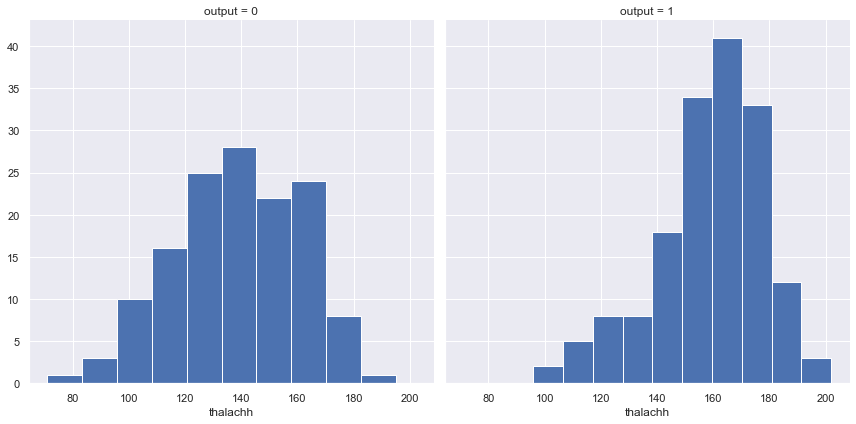

In [24]:
plt.figure(figsize=(8,6))
plt.hist(data=data,x='thalachh')
plt.title('Thalachh Distribution\n',fontsize=15)
plt.show()
print('Output vs Thalachh')
sns.FacetGrid(data,col='output',height=6).map(plt.hist,'thalachh') 
plt.show()

*People with Thalachh more than 140 are prone to heart attack*

Output vs Excercise Induced Angina (exng)

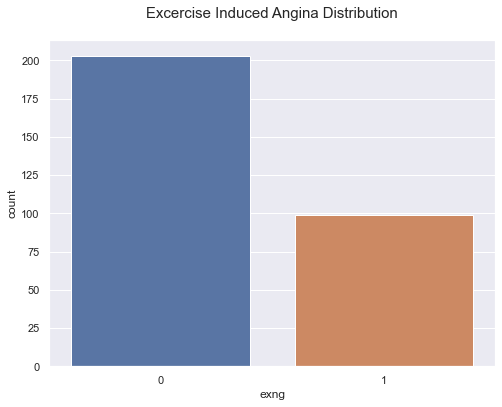

Output vs Excercise Induced Angina


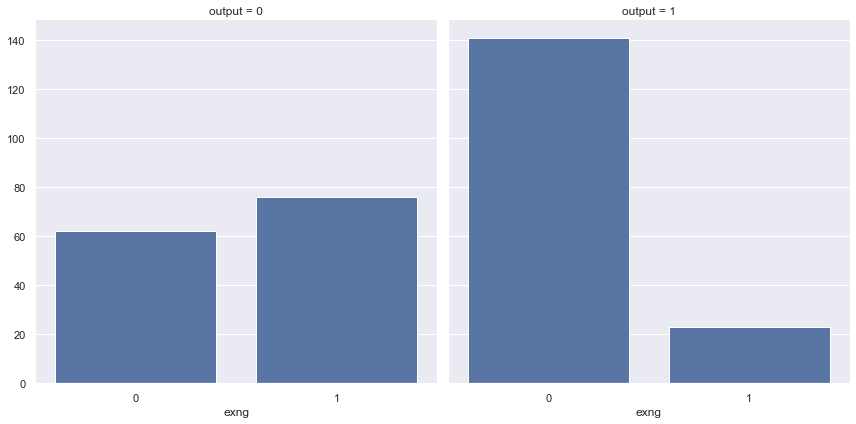

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(data=data,x='exng')
plt.title('Excercise Induced Angina Distribution\n',fontsize=15) 
plt.show()
print('Output vs Excercise Induced Angina')
sns.FacetGrid(data,col='output',height=6).map(sns.countplot,'exng')
plt.show()

*Significant number of people in deseased cohort are with no exercise induced angina (type: 0), It means this variable is a strong predictor*

Output vs Depression Induced by Exercise Relative to Rest (oldpeak)

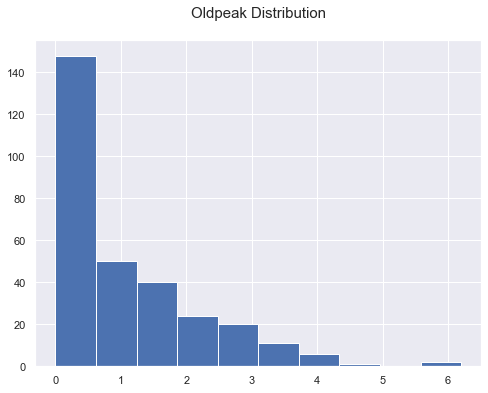

Output vs Oldpeak


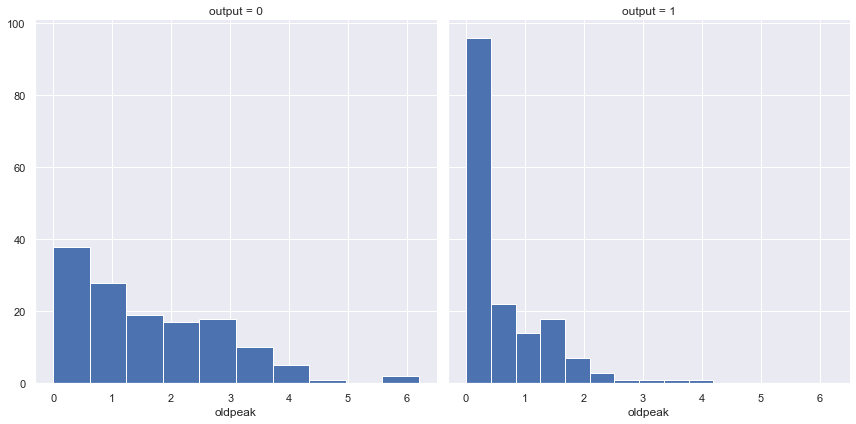

In [26]:
plt.figure(figsize=(8,6))
plt.hist(data=data,x='oldpeak')
plt.title('Oldpeak Distribution\n',fontsize=15) 
plt.show()
print('Output vs Oldpeak')
sns.FacetGrid(data,col='output',height=6).map(plt.hist,'oldpeak')
plt.show()

Output vs Slope:

The slope of the peak exercise ST segment

Value 0: Up-Sloping

Value 1: Flat

Value 2: Down-Sloping

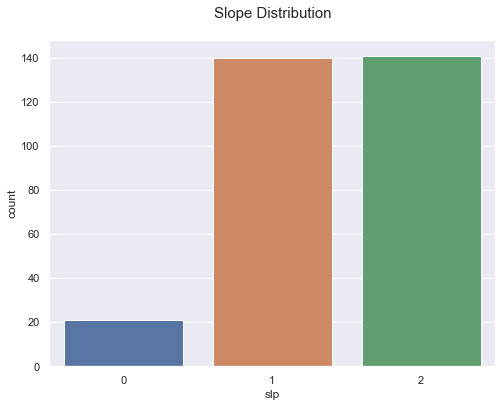

Output vs Slope


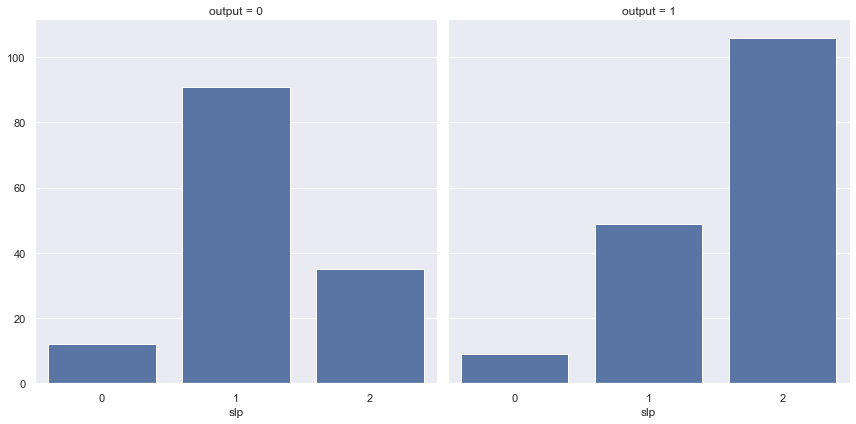

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(data=data,x='slp')
plt.title('Slope Distribution\n',fontsize=15) 
plt.show()
print('Output vs Slope')
sns.FacetGrid(data,col='output',height=6).map(sns.countplot,'slp')
plt.show()

*People with Down-Sloping(Value: 2) are more prone to heart attack*

Output vs Ca: Number of major vessels (0-3) colored by fluoroscopy

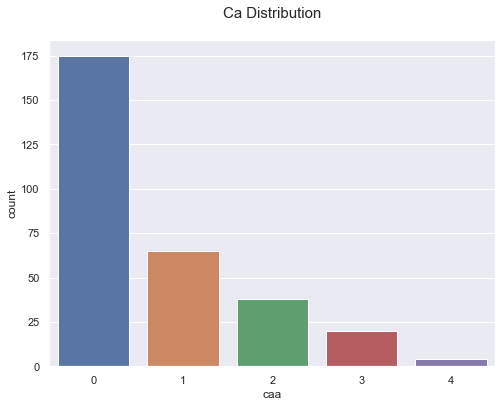

Output vs Ca


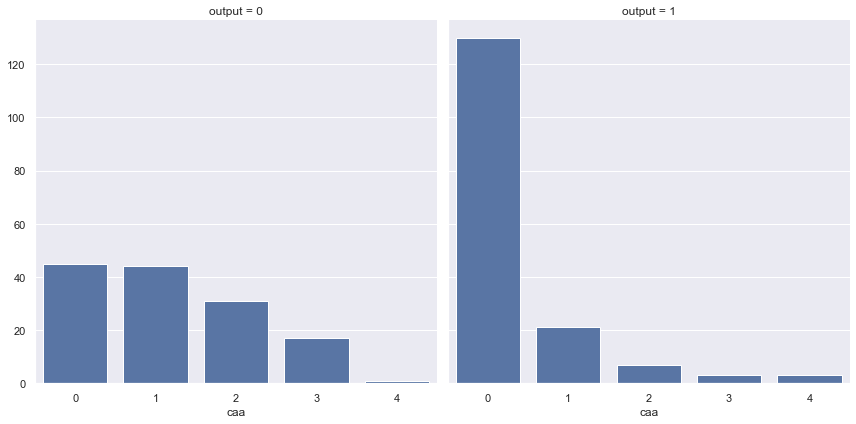

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(data=data,x='caa')
plt.title('Ca Distribution\n',fontsize=15) 
plt.show()
print('Output vs Ca')
sns.FacetGrid(data,col='output',height=6).map(sns.countplot,'caa')
plt.show()

Output vs Thal


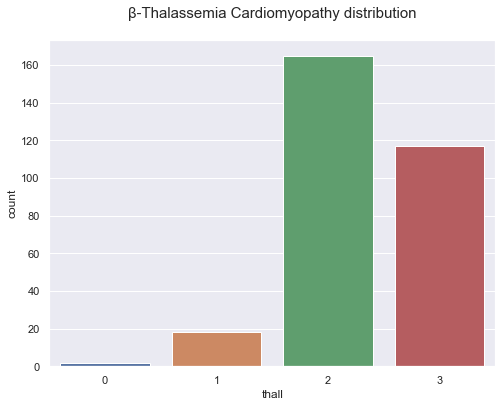

Output vs Thall


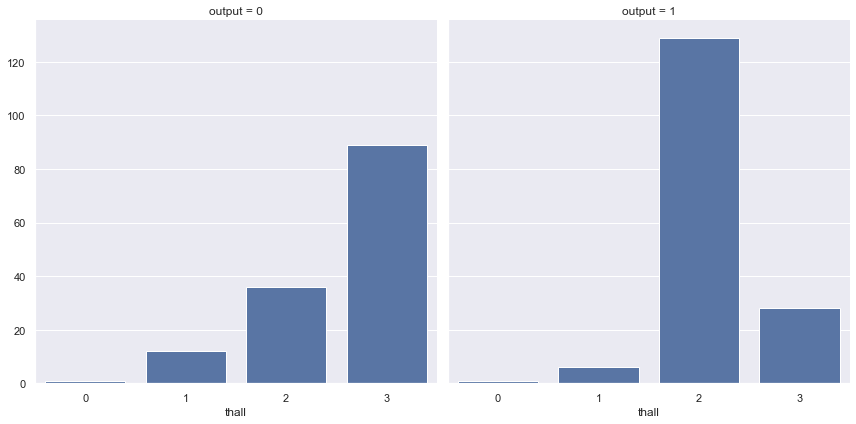

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(data=data,x='thall')
plt.title('β-Thalassemia Cardiomyopathy distribution\n',fontsize=15) 
plt.show()
print('Output vs Thall')
sns.FacetGrid(data,col='output',height=6).map(sns.countplot,'thall')
plt.show()

**Multivariate Analysis**

Gender v/s Thalassemia

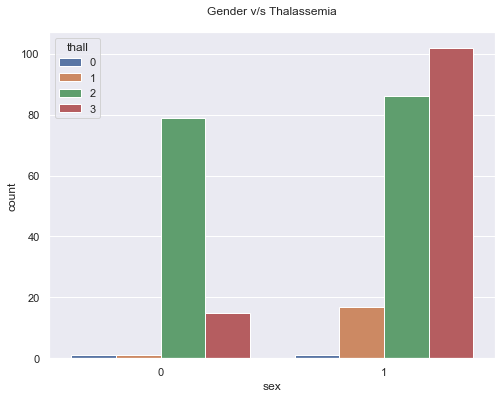

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(data= data, x= 'sex', hue= 'thall')
plt.title('Gender v/s Thalassemia\n') 
plt.show()

Slope v/s Target

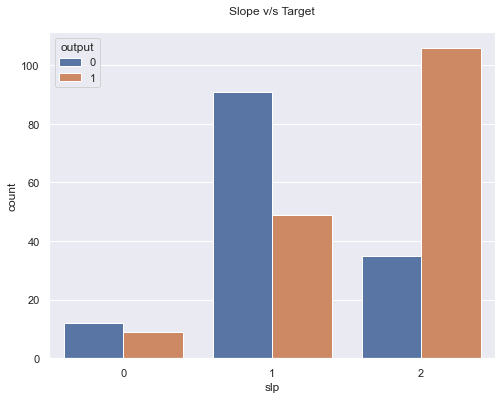

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(data= data, x= 'slp', hue= 'output')
plt.title('Slope v/s Target\n') 
plt.show()

exng v/s Thalassemia

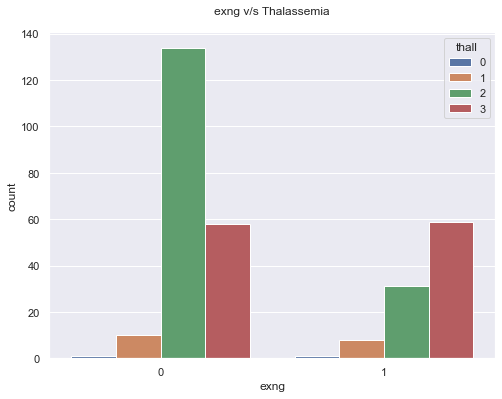

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(data= data, x= 'exng', hue= 'thall')
plt.title('exng v/s Thalassemia\n')  
plt.show()

Gender, Chest Pain Type and β-Thalassemia

Text(0.5, 0.98, 'Gender, Chest Pain Type and β-Thalassemia')

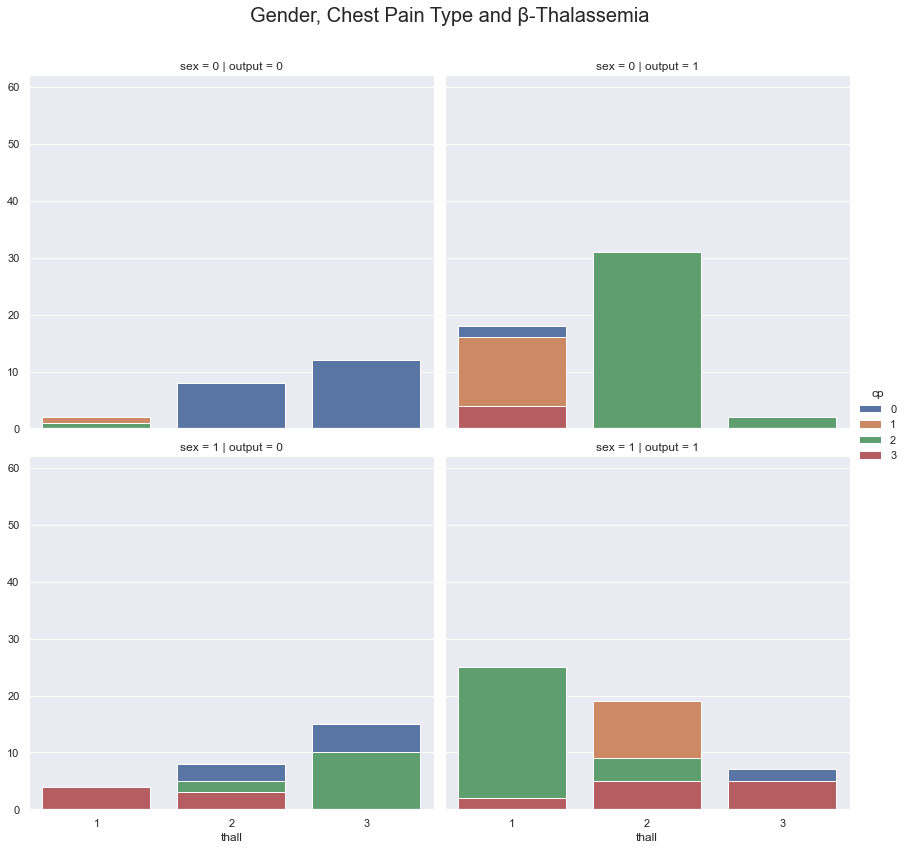

In [33]:
g= sns.FacetGrid(data, row= 'sex', col='output', hue= 'cp',height=6).map(sns.countplot,  'thall').add_legend() 
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Gender, Chest Pain Type and β-Thalassemia', fontsize= 20) 

*Most female and male patients diagnosed with β-Thalassemia, or the reversible phenotype, and displaying signs of cardiac disease did not exhibit non-stress induced angina pain*

Gender, Chest Pain and Age

Text(0.5, 0.98, 'Gender, Chest Pain and Age ')

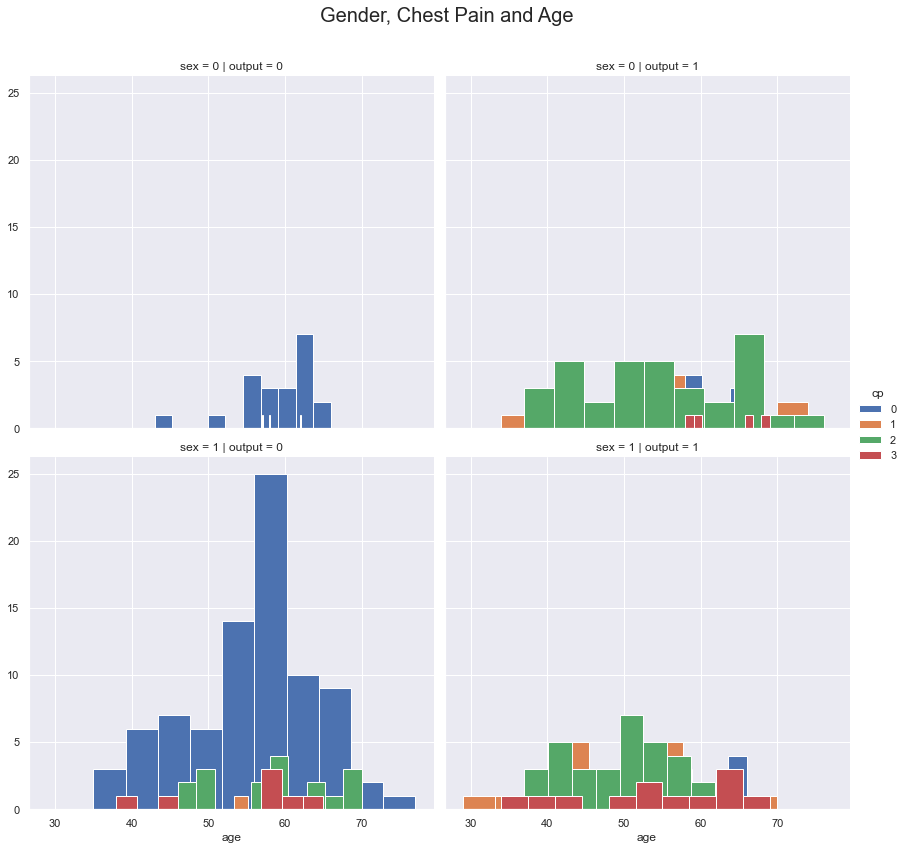

In [34]:
g = sns.FacetGrid(data, col= 'output', row= 'sex', hue= 'cp', height=6).map(plt.hist,  'age').add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Gender, Chest Pain and Age ', fontsize= 20) 

Gender, Chest Pain Type and Exercise Induced Angina

In [35]:
data.head(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


Text(0.5, 0.98, 'Gender, Chest Pain Type and Exercise Induced Angina')

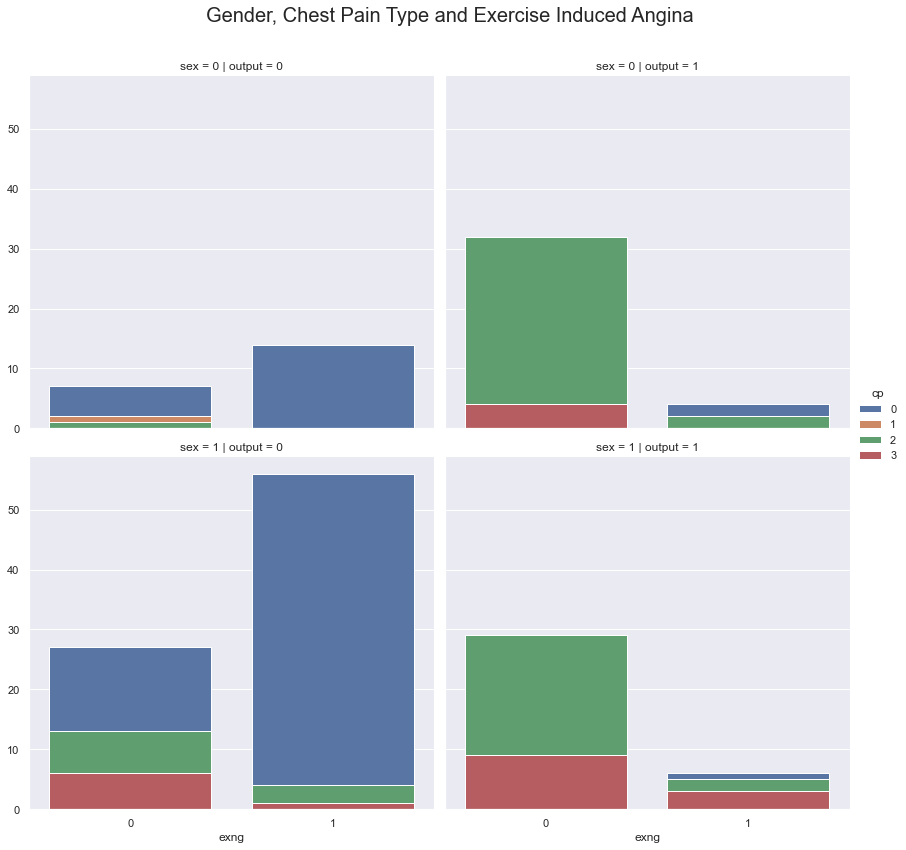

In [36]:
g= sns.FacetGrid(data, col='output', row= 'sex', hue='cp', height= 6).map(sns.countplot, 'exng').add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Gender, Chest Pain Type and Exercise Induced Angina', fontsize= 20) 

*Although the majority of males and females diagnosed with cardiac disease were asymptomatic for angina pain, they actually exhibit exercise induced angina pain . This added further support to the use of the exercise induced angina pain feature for the prediction of heart disease.*

**Feature Engineering**

**Outlier Detection and Treatment**

In [37]:
data.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


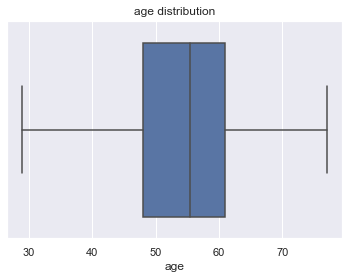

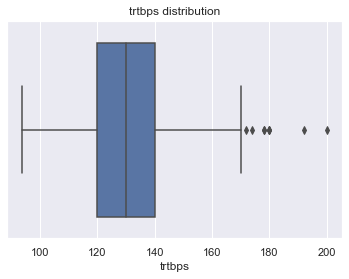

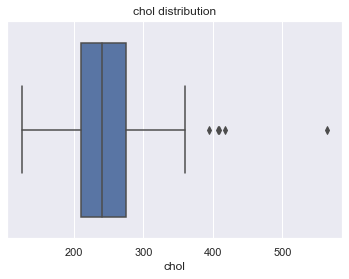

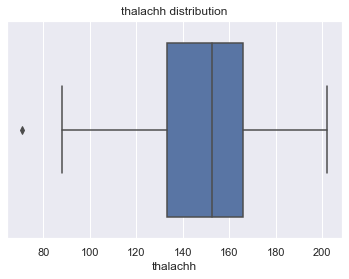

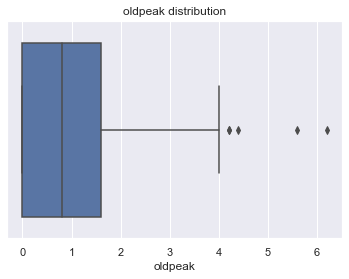

In [38]:
col_list = ['age','trtbps','chol','thalachh','oldpeak']
for col in col_list:
    sns.boxplot(data= data , x= col)
    plt.title(f'{col} distribution')
    plt.show()

*It is clear that some features have outliers*

**Remove outliers using z-score**

In [39]:
from scipy import stats

In [40]:
data.shape

(302, 14)

In [41]:
z = np.abs(stats.zscore(data))
df = data[(z<3).all(axis=1)] 

In [42]:
df.shape

(287, 14)

*Removed 15 records which are ouliers*

**Converting continuous numerical values to categorical**

AGE, TRTBPS, THALACHH,OLDPEAK AND CHOL are features with continuous values.

In [43]:
df['age_range']= pd.qcut(x= df.age, q= 3)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(59.0, 77.0]"
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(28.999, 51.0]"
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(28.999, 51.0]"
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(51.0, 59.0]"
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(51.0, 59.0]"


In [44]:
df[['age_range','output']].groupby('age_range',as_index= False).mean()

,age_range,output
0,"(28.999, 51.0]",0.701923
1,"(51.0, 59.0]",0.500000
2,"(59.0, 77.0]",0.423529


*Now categorize age_range into 3 groups of (0,1,2)*

In [45]:
age_bins = []
for age in df.age:
    if age <= 51 :
        age_bins.append(0)
    elif age >51 and age <= 59:
        age_bins.append(1)
    else:
        age_bins.append(2)
df['age_bins'] = age_bins


In [46]:
df.drop(columns=['age','age_range'],axis=1,inplace=True)
df.head()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_bins
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


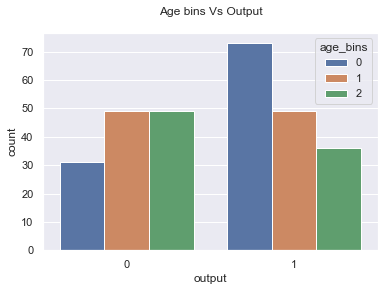

In [47]:
sns.countplot(data=df,x='output',hue='age_bins')
plt.title('Age bins Vs Output\n') 
plt.show()

In [48]:
df['trtbps_range']=  pd.qcut(df.trtbps,3)
df.head()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_bins,trtbps_range
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2,"(138.0, 180.0]"
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,"(122.0, 138.0]"
2,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,"(122.0, 138.0]"
3,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,"(93.999, 122.0]"
4,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,"(93.999, 122.0]"


In [49]:
df[['trtbps_range','output']].groupby('trtbps_range',as_index=False).mean()

,trtbps_range,output
0,"(93.999, 122.0]",0.626263
1,"(122.0, 138.0]",0.546392
2,"(138.0, 180.0]",0.472527


*Now categorize trtbps_range into 3 groups of (0,1,2)*

In [50]:
trtbps_bins= []
for trtbps in df.trtbps:
    if trtbps <= 122.0 :
        trtbps_bins.append(0)
    elif trtbps > 122.0 and trtbps <= 138.0 :
        trtbps_bins.append(1)
    else:
        trtbps_bins.append(2)
df['trtbps_bins'] = trtbps_bins
df.head()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_bins,trtbps_range,trtbps_bins
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2,"(138.0, 180.0]",2
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,"(122.0, 138.0]",1
2,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,"(122.0, 138.0]",1
3,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,"(93.999, 122.0]",0
4,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,"(93.999, 122.0]",0


In [51]:
df.drop(columns=['trtbps','trtbps_range'],axis=1,inplace= True)
df.head()

,sex,cp,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_bins,trtbps_bins
0,1,3,233,1,0,150,0,2.3,0,0,1,1,2,2
1,1,2,250,0,1,187,0,3.5,0,0,2,1,0,1
2,0,1,204,0,0,172,0,1.4,2,0,2,1,0,1
3,1,1,236,0,1,178,0,0.8,2,0,2,1,1,0
4,0,0,354,0,1,163,1,0.6,2,0,2,1,1,0


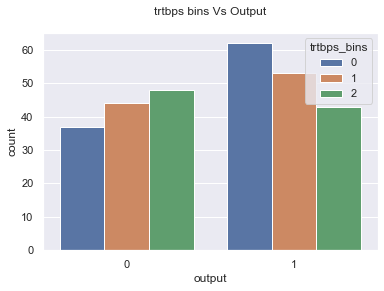

In [52]:
sns.countplot(data=df,x='output',hue='trtbps_bins')
plt.title('trtbps bins Vs Output\n') 
plt.show()

In [53]:
df['chol_range']  = pd.qcut(df.chol,4)

In [54]:
df[['chol_range','output']].groupby('chol_range',as_index=False).mean()

,chol_range,output
0,"(125.999, 211.0]",0.635135
1,"(211.0, 241.0]",0.585714
2,"(241.0, 274.0]",0.534247
3,"(274.0, 394.0]",0.442857


In [55]:
chol_bins= [] 
for chol in df.chol:
    if chol <= 211.0 :
        chol_bins.append(0) 
    elif chol > 211.0 and chol <= 241.0 :
        chol_bins.append(1)
    elif chol > 241.0 and chol <=  274.0:
        chol_bins.append(2) 
    else:
        chol_bins.append(3) 
df['chol_bins'] = chol_bins
df.head()

,sex,cp,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_bins,trtbps_bins,chol_range,chol_bins
0,1,3,233,1,0,150,0,2.3,0,0,1,1,2,2,"(211.0, 241.0]",1
1,1,2,250,0,1,187,0,3.5,0,0,2,1,0,1,"(241.0, 274.0]",2
2,0,1,204,0,0,172,0,1.4,2,0,2,1,0,1,"(125.999, 211.0]",0
3,1,1,236,0,1,178,0,0.8,2,0,2,1,1,0,"(211.0, 241.0]",1
4,0,0,354,0,1,163,1,0.6,2,0,2,1,1,0,"(274.0, 394.0]",3


In [56]:
df.drop(columns=['chol','chol_range'],axis= 1, inplace= True) 
df.head()

,sex,cp,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_bins,trtbps_bins,chol_bins
0,1,3,1,0,150,0,2.3,0,0,1,1,2,2,1
1,1,2,0,1,187,0,3.5,0,0,2,1,0,1,2
2,0,1,0,0,172,0,1.4,2,0,2,1,0,1,0
3,1,1,0,1,178,0,0.8,2,0,2,1,1,0,1
4,0,0,0,1,163,1,0.6,2,0,2,1,1,0,3


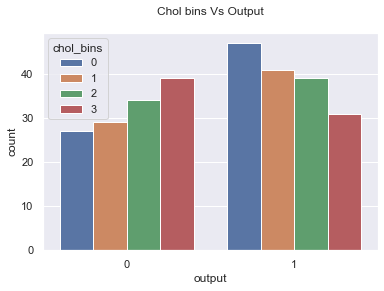

In [57]:
sns.countplot(data=df,x='output',hue='chol_bins')
plt.title('Chol bins Vs Output\n') 
plt.show()

In [58]:
df['thalachh_range'] = pd.qcut(x= df.thalachh, q= 3)
df.head()

,sex,cp,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_bins,trtbps_bins,chol_bins,thalachh_range
0,1,3,1,0,150,0,2.3,0,0,1,1,2,2,1,"(142.333, 162.0]"
1,1,2,0,1,187,0,3.5,0,0,2,1,0,1,2,"(162.0, 202.0]"
2,0,1,0,0,172,0,1.4,2,0,2,1,0,1,0,"(162.0, 202.0]"
3,1,1,0,1,178,0,0.8,2,0,2,1,1,0,1,"(162.0, 202.0]"
4,0,0,0,1,163,1,0.6,2,0,2,1,1,0,3,"(162.0, 202.0]"


In [59]:
df[['thalachh_range','output']].groupby('thalachh_range',as_index=False).mean()

,thalachh_range,output
0,"(87.999, 142.333]",0.281250
1,"(142.333, 162.0]",0.594059
2,"(162.0, 202.0]",0.788889


In [60]:
thalachh_bins= [] 
for thalachh in df.thalachh: 
    if thalachh <= 142.333 :
        thalachh_bins.append(0) 
    elif thalachh > 142.333 and thalachh <= 162.0 :
        thalachh_bins.append(1) 
    else:
        thalachh_bins.append(2) 
df['thalachh_bins'] = thalachh_bins
df.head()

,sex,cp,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_bins,trtbps_bins,chol_bins,thalachh_range,thalachh_bins
0,1,3,1,0,150,0,2.3,0,0,1,1,2,2,1,"(142.333, 162.0]",1
1,1,2,0,1,187,0,3.5,0,0,2,1,0,1,2,"(162.0, 202.0]",2
2,0,1,0,0,172,0,1.4,2,0,2,1,0,1,0,"(162.0, 202.0]",2
3,1,1,0,1,178,0,0.8,2,0,2,1,1,0,1,"(162.0, 202.0]",2
4,0,0,0,1,163,1,0.6,2,0,2,1,1,0,3,"(162.0, 202.0]",2


In [61]:
df.drop(['thalachh','thalachh_range'],axis=1,inplace=True)
df.head()

,sex,cp,fbs,restecg,exng,oldpeak,slp,caa,thall,output,age_bins,trtbps_bins,chol_bins,thalachh_bins
0,1,3,1,0,0,2.3,0,0,1,1,2,2,1,1
1,1,2,0,1,0,3.5,0,0,2,1,0,1,2,2
2,0,1,0,0,0,1.4,2,0,2,1,0,1,0,2
3,1,1,0,1,0,0.8,2,0,2,1,1,0,1,2
4,0,0,0,1,1,0.6,2,0,2,1,1,0,3,2


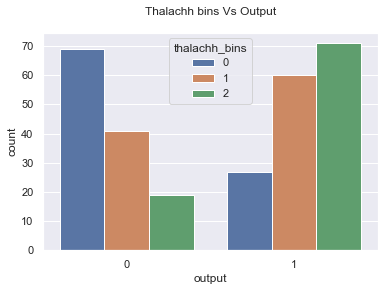

In [62]:
sns.countplot(data=df,x='output',hue='thalachh_bins')
plt.title('Thalachh bins Vs Output\n') 
plt.show()

In [63]:
df['oldpeak_range'] = pd.qcut(x= df.oldpeak, q= 3)
df.head()

,sex,cp,fbs,restecg,exng,oldpeak,slp,caa,thall,output,age_bins,trtbps_bins,chol_bins,thalachh_bins,oldpeak_range
0,1,3,1,0,0,2.3,0,0,1,1,2,2,1,1,"(1.4, 4.4]"
1,1,2,0,1,0,3.5,0,0,2,1,0,1,2,2,"(1.4, 4.4]"
2,0,1,0,0,0,1.4,2,0,2,1,0,1,0,2,"(0.1, 1.4]"
3,1,1,0,1,0,0.8,2,0,2,1,1,0,1,2,"(0.1, 1.4]"
4,0,0,0,1,1,0.6,2,0,2,1,1,0,3,2,"(0.1, 1.4]"


In [64]:
df[['oldpeak_range','output']].groupby('oldpeak_range',as_index=False).mean()

,oldpeak_range,output
0,"(-0.001, 0.1]",0.740000
1,"(0.1, 1.4]",0.582524
2,"(1.4, 4.4]",0.285714


In [65]:
oldpeak_bins= [] 
for oldpeak in df.oldpeak: 
    if oldpeak <= 0.1 :
        oldpeak_bins.append(0) 
    elif oldpeak > 0.1 and oldpeak <= 1.4 :
        oldpeak_bins.append(1) 
    else:
        oldpeak_bins.append(2) 
df['oldpeak_bins'] = oldpeak_bins
df.head()

,sex,cp,fbs,restecg,exng,oldpeak,slp,caa,thall,output,age_bins,trtbps_bins,chol_bins,thalachh_bins,oldpeak_range,oldpeak_bins
0,1,3,1,0,0,2.3,0,0,1,1,2,2,1,1,"(1.4, 4.4]",2
1,1,2,0,1,0,3.5,0,0,2,1,0,1,2,2,"(1.4, 4.4]",2
2,0,1,0,0,0,1.4,2,0,2,1,0,1,0,2,"(0.1, 1.4]",1
3,1,1,0,1,0,0.8,2,0,2,1,1,0,1,2,"(0.1, 1.4]",1
4,0,0,0,1,1,0.6,2,0,2,1,1,0,3,2,"(0.1, 1.4]",1


In [66]:
df.drop(['oldpeak','oldpeak_range'],axis=1,inplace=True)
df.head()

,sex,cp,fbs,restecg,exng,slp,caa,thall,output,age_bins,trtbps_bins,chol_bins,thalachh_bins,oldpeak_bins
0,1,3,1,0,0,0,0,1,1,2,2,1,1,2
1,1,2,0,1,0,0,0,2,1,0,1,2,2,2
2,0,1,0,0,0,2,0,2,1,0,1,0,2,1
3,1,1,0,1,0,2,0,2,1,1,0,1,2,1
4,0,0,0,1,1,2,0,2,1,1,0,3,2,1


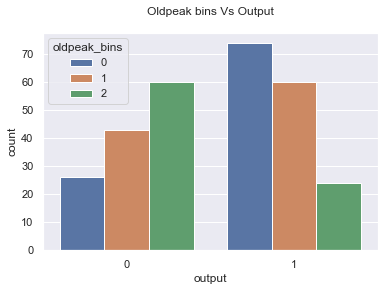

In [67]:
sns.countplot(data=df,x='output',hue='oldpeak_bins')
plt.title('Oldpeak bins Vs Output\n') 
plt.show()

**Splitting Variables Into Train and Test**

In [68]:
df.head()

,sex,cp,fbs,restecg,exng,slp,caa,thall,output,age_bins,trtbps_bins,chol_bins,thalachh_bins,oldpeak_bins
0,1,3,1,0,0,0,0,1,1,2,2,1,1,2
1,1,2,0,1,0,0,0,2,1,0,1,2,2,2
2,0,1,0,0,0,2,0,2,1,0,1,0,2,1
3,1,1,0,1,0,2,0,2,1,1,0,1,2,1
4,0,0,0,1,1,2,0,2,1,1,0,3,2,1


In [69]:
x= df.drop(['output','restecg'], axis = 1)
y = df['output']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.1, random_state= 0 ) 

**Apply Different Machine Learning Models**

In [70]:
# Using Random forest classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

print("Accuracy of Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))

Accuracy of Random Forest Classifier ::  0.896551724137931


Logistic Regression

In [71]:
logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(x_train, y_train)
#Check accuracy of Logistic Regression
y_pred_logReg = logReg.predict(x_test)
#Model Accuracy
print("Accuracy of logistic regression classifier :: " ,metrics.accuracy_score(y_test,y_pred_logReg))

Accuracy of logistic regression classifier ::  1.0


<AxesSubplot:>

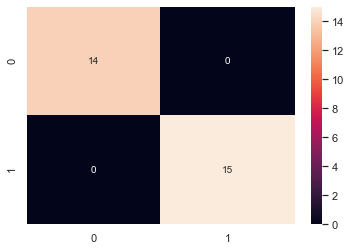

In [72]:
cm= confusion_matrix(y_test,y_pred_logReg)
sns.heatmap(cm,annot= True)

KNN

In [74]:
for n in range (3, 20, 2):
    knn = KNeighborsClassifier (n_neighbors = n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc_knn = round(knn.score(x_train, y_train) * 100, 2)
    print("The accuracy with", n, "neihbors is:", acc_knn)
    
    y_pred

The accuracy with 3 neihbors is: 87.98
The accuracy with 5 neihbors is: 86.43
The accuracy with 7 neihbors is: 83.33
The accuracy with 9 neihbors is: 81.01
The accuracy with 11 neihbors is: 80.23
The accuracy with 13 neihbors is: 80.23
The accuracy with 15 neihbors is: 81.01
The accuracy with 17 neihbors is: 80.62
The accuracy with 19 neihbors is: 81.4


Comapare performance of different models 

In [83]:
models = pd.DataFrame({
    "Model": ["Random Forest","Logistic Regression","KNN"],
    "Score": [ metrics.accuracy_score(y_test, y_pred_rf)*100, metrics.accuracy_score(y_test,y_pred_logReg)*100, acc_knn]
})


In [84]:
models

,Model,Score
0,Random Forest,89.655172
1,Logistic Regression,100.000000
2,KNN,81.400000


*It is clear that logistic regression perfectly fit for this model*